# Data based on the professional Overwatch League.

- In this data we will be able to see how each of the teams perform while they are playing as either the Home Team or as playing as the Away Team. Now every team will eventually play on either side so from this data we will be able to find out just how each team performs when playing for either side. 

- First we will set up the database in sqlite3 by importing the CSV file of games.csv into sqlite3 to be able to call on the data and to have as a reference. 

In [1]:
import sqlite3 
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('games.csv')

In [3]:
print(data)

     match_id    stage           start_time team1 team2 match_format  game_id  \
0       21211  Stage 1  2019-02-14 16:00:00   PHI   LDN      regular  20822.0   
1       21211  Stage 1  2019-02-14 16:00:00   PHI   LDN      regular  20881.0   
2       21211  Stage 1  2019-02-14 16:00:00   PHI   LDN      regular  20882.0   
3       21211  Stage 1  2019-02-14 16:00:00   PHI   LDN      regular  20883.0   
4       21221  Stage 1  2019-02-14 17:40:00   NYE   BOS      regular  20809.0   
5       21221  Stage 1  2019-02-14 17:40:00   NYE   BOS      regular  20810.0   
6       21221  Stage 1  2019-02-14 17:40:00   NYE   BOS      regular  20891.0   
7       21221  Stage 1  2019-02-14 17:40:00   NYE   BOS      regular  20892.0   
8       21231  Stage 1  2019-02-14 19:30:00   SEO   GLA      regular  20893.0   
9       21231  Stage 1  2019-02-14 19:30:00   SEO   GLA      regular  20894.0   
10      21231  Stage 1  2019-02-14 19:30:00   SEO   GLA      regular  20895.0   
11      21231  Stage 1  2019

### Data types and shape

- Next we will get the data types and shape of the CSV file so that we can accurately make the table in the database 

In [4]:
data.shape

(484, 15)

In [5]:
data.dtypes

match_id          int64
stage            object
start_time       object
team1            object
team2            object
match_format     object
game_id         float64
game_number     float64
map_name         object
score1          float64
score2          float64
roster1          object
roster2          object
full_roster1     object
full_roster2     object
dtype: object

## Creating the database with the CSV file

- With the database set up we can call into it to get the data that we need to be able to make the graphs 

In [6]:
# con = sqlite3.connect(":memory:")
db = sqlite3.connect("owl.db")
cur = db.cursor()

cur.execute('''DROP TABLE IF EXISTS[OverWatchLeague]''')
cur.execute('''CREATE TABLE OverWatchLeague(match_id integer, stage text, start_time text, team1 text, team2 text, match_format text, game_id real, game_number real, map_name text, score1 real, score2 real, roster1 text, roster2 text, full_roster1 text, full_roster2 text)''')

with open('games.csv','r') as games_table:
    dr = csv.DictReader(games_table) # comma is default delimiter
    to_db = [(i['match_id'], i['stage'], i['start_time'], i['team1'], i['team2'], i['match_format'], i['game_id'], i['game_number'], i['map_name'], i['score1'], i['score2'], i['roster1'], i['roster2'], i['full_roster1'], i['full_roster2']) for i in dr]

cur.executemany("INSERT INTO OverWatchLeague (match_id, stage, start_time, team1, team2, match_format, game_id, game_number, map_name, score1, score2, roster1, roster2, full_roster1, full_roster2) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", to_db)
db.commit()

In [7]:
OverWatchLeague = pd.read_sql("SELECT match_id as match, team1 AS HomeTeam, team2 AS AwayTeam, score1 as HomeScore, score2 as AwayScore, map_name AS map FROM OverWatchLeague WHERE map_name != ''", db)
OverWatchLeague

,match,HomeTeam,AwayTeam,HomeScore,AwayScore,map
0,21211,PHI,LDN,2.0,1.0,ilios
1,21211,PHI,LDN,3.0,2.0,hollywood
2,21211,PHI,LDN,4.0,5.0,volskaya
3,21221,NYE,BOS,2.0,0.0,nepal
4,21221,NYE,BOS,3.0,4.0,numbani
5,21221,NYE,BOS,4.0,4.0,horizon-lunar-colony
6,21221,NYE,BOS,3.0,2.0,route-66
7,21231,SEO,GLA,0.0,2.0,ilios
8,21231,SEO,GLA,3.0,1.0,kings-row
9,21231,SEO,GLA,1.0,0.0,horizon-lunar-colony


## Splitting up the data into Home Teams and Away Teams

- Now that the database is set up and is showing us the data that we need, now we can split it up into showing us how the teams played when they were either the Home Team versus how well they played as the Away Team

In [8]:
db = sqlite3.connect("owl.db")
cur = db.cursor()

HomeTeamScore_sql = "SELECT match_id As match, team1 HomeTeam, SUM(score1) AS TotalHomeScore FROM OverWatchLeague GROUP BY team1"
HomeTeamScore = pd.read_sql_query(HomeTeamScore_sql,db)
db.commit()
print(HomeTeamScore)

    match HomeTeam  TotalHomeScore
0   21241      ATL            27.0
1   21302      BOS             7.0
2   21212      CDH            19.0
3   21126      DAL            17.0
4   21214      FLA            21.0
5   21243      GLA            17.0
6   21272      GZC            15.0
7   21213      HOU            23.0
8   21301      HZS            19.0
9   21209      LDN             8.0
10  21221      NYE            48.0
11  21263      PAR            14.0
12  21211      PHI            36.0
13  21231      SEO            51.0
14  21128      SFS            29.0
15  21176      SHD            41.0
16  21177      TOR            36.0
17  21251      VAL            34.0
18  21222      VAN            47.0
19  21127      WAS            26.0


In [9]:
db = sqlite3.connect("owl.db")
cur = db.cursor()

AwayTeamScore_sql = "SELECT match_id As match, team2 AS AwayTeam, SUM(score2) AS TotalAwayScore FROM OverWatchLeague GROUP BY team2"
AwayTeamScore = pd.read_sql_query(AwayTeamScore_sql,db)
db.commit()
print(AwayTeamScore)

    match AwayTeam  TotalAwayScore
0   21261      ATL            20.0
1   21221      BOS            56.0
2   21233      CDH            27.0
3   21271      DAL            39.0
4   21241      FLA            23.0
5   21231      GLA            44.0
6   21212      GZC            36.0
7   21177      HOU            31.0
8   21176      HZS            31.0
9   21211      LDN            37.0
10  21127      NYE            12.0
11  21209      PAR            29.0
12  21252      PHI            18.0
13  21264      SEO             1.0
14  21126      SFS            40.0
15  21222      SHD            21.0
16  21178      TOR            27.0
17  21242      VAL            21.0
18  21303      VAN            10.0
19  21273      WAS            13.0


## Creating the graph

- With teams split up into HomeTeamScore and AwayTeamScore we can plug the data into a side-by-side bar chart to represent how each team performed when they were on either side. We can also see the tallied amounts of each team to get an accurate match point score for the bar graph. 

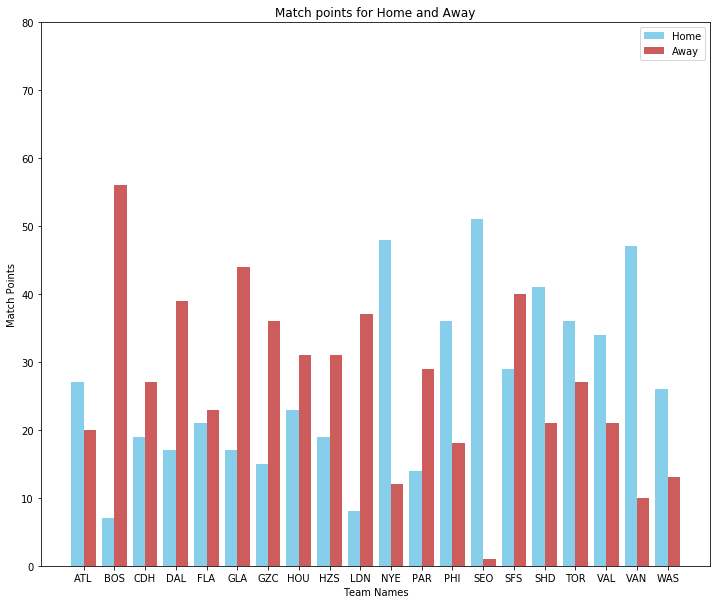

In [10]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 10

N = 20 
ind = np.arange(len(HomeTeamScore))    # the x locations for the groups
width = .4    # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, HomeTeamScore.TotalHomeScore, width,
                color='SkyBlue', label='Home')
rects2 = ax.bar(ind + width/2, AwayTeamScore.TotalAwayScore, width,
                color='IndianRed', label='Away')

#setting the xlabel and ylabel along with the title of the side-by-side bar chart.

ax.set_xlabel('Team Names')
ax.set_ylabel('Match Points')
ax.set_title('Match points for Home and Away')
ax.set_xticks(ind)
ax.set_xticklabels(('ATL', 'BOS', 'CDH', 'DAL', 'FLA', 'GLA', 'GZC', 'HOU', 'HZS', 'LDN', 'NYE', 'PAR', 'PHI', 'SEO', 'SFS', 'SHD', 'TOR', 'VAL', 'VAN', 'WAS'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend((rects1[0], rects2[0]), ('Home', 'Away'))

plt.show()

## Reading the data from the stacked bar chart

- From this data we can see how each team did when they were either representing the Home Team versus when they were representing the Away Team.

- One example would be that SEO or Seoul Dynasty performs better when they are playing as the home team by a significant amount. They have the highest number of match points than any other team when theyre playing as the Home Team versus when theyre playing as the Away Team, which they have the lowest points in.

- On the other hand we see that BOS or Boston Uprising, has the lowest number of match points when they are representing the Home Team as opposed to when they're playing as the Away Team where it looks like they score more than the rest of the teams despite their low performances as the Home Team. 

- Last example is SFS or San Francisco Shock and VAL or Los Angeles Valiant, their match points seem to be pretty even whether or not they are playing for either team.

# Putting the data into a pichart 

- Now we will put the data that we have to see the percentage of match points for when the teams were representing either Home or Away teams. 

- Since most we already have the teams split up already, we can generate two different pie charts to represent Home and Away. 

In [11]:
db = sqlite3.connect("owl.db")
cur = db.cursor()

HomeTeamScore_sql = "SELECT match_id As match, team1 AS HomeTeam, SUM(score1) AS TotalHomeScore FROM OverWatchLeague GROUP BY team1"
HomeTeamScore = pd.read_sql_query(HomeTeamScore_sql,db)
db.commit()
print(HomeTeamScore)

    match HomeTeam  TotalHomeScore
0   21241      ATL            27.0
1   21302      BOS             7.0
2   21212      CDH            19.0
3   21126      DAL            17.0
4   21214      FLA            21.0
5   21243      GLA            17.0
6   21272      GZC            15.0
7   21213      HOU            23.0
8   21301      HZS            19.0
9   21209      LDN             8.0
10  21221      NYE            48.0
11  21263      PAR            14.0
12  21211      PHI            36.0
13  21231      SEO            51.0
14  21128      SFS            29.0
15  21176      SHD            41.0
16  21177      TOR            36.0
17  21251      VAL            34.0
18  21222      VAN            47.0
19  21127      WAS            26.0


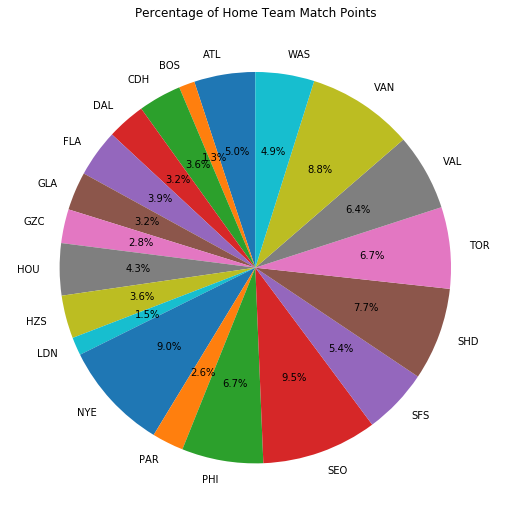

In [12]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 9

plt.pie(HomeTeamScore.TotalHomeScore, labels=HomeTeamScore.HomeTeam, startangle=90, autopct='%.1f%%')
plt.title('Percentage of Home Team Match Points')
plt.show()

## Home Team pie chart percentages

- Much like the stacked bar chart its easy to see the top teams and the percentage of match points they scored for the Home Team. 

- The top two teams who had the highest percentages are NYE or New York Excelsior and SEO both having 9% of the match points for the Home team. It is interesting to see the one of the newer teams to step into the League, VAN or Vancouver Titans aren't far behind them with 8.8% of the match points scored for the Home Team. 

In [13]:
db = sqlite3.connect("owl.db")
cur = db.cursor()

AwayTeamScore_sql = "SELECT match_id As match, team2 AS AwayTeam, SUM(score2) AS TotalAwayScore FROM OverWatchLeague GROUP BY team2"
AwayTeamScore = pd.read_sql_query(AwayTeamScore_sql,db)
db.commit()
print(AwayTeamScore)

    match AwayTeam  TotalAwayScore
0   21261      ATL            20.0
1   21221      BOS            56.0
2   21233      CDH            27.0
3   21271      DAL            39.0
4   21241      FLA            23.0
5   21231      GLA            44.0
6   21212      GZC            36.0
7   21177      HOU            31.0
8   21176      HZS            31.0
9   21211      LDN            37.0
10  21127      NYE            12.0
11  21209      PAR            29.0
12  21252      PHI            18.0
13  21264      SEO             1.0
14  21126      SFS            40.0
15  21222      SHD            21.0
16  21178      TOR            27.0
17  21242      VAL            21.0
18  21303      VAN            10.0
19  21273      WAS            13.0


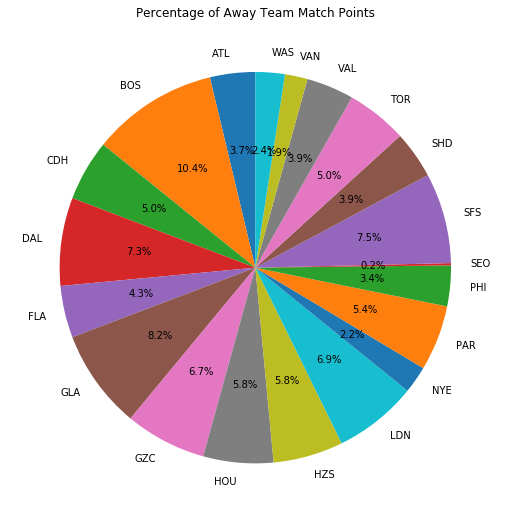

In [14]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 9

plt.pie(AwayTeamScore.TotalAwayScore, labels=AwayTeamScore.AwayTeam, startangle=90, autopct='%.1f%%')
plt.title('Percentage of Away Team Match Points')
plt.show()

## Away Team pie chart percentages

- The interesting part of this is seeing that SEO score significantly less when playing as the Away team. Going from a 9.5% of the Home teams match points to less that 1% for the Away team.

- The other interesting conclusion from these pie charts is seeing the massive percentage difference that BOS has. While the stacked bar chart only displays the scores of each of the teams when they played on either side, here we can see the percentage differnce each team had. Its absolutely staggering that BOS had an increase of 9.1% when playing as the Away team. 